In [33]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra
import radical.entk as re 

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob
from math import sqrt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

In [42]:
df = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution','Pre Exec Overhead'])
df_err = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution', 'Pre Exec Overhead'])

df_3s = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution','Pre Exec Overhead'])
df_3s_err = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution', 'Pre Exec Overhead'])



# hyper_4 = {'experiments':['exp1', 'exp2']}
# hyper_5 = {'experiments':['exp3', 'exp4']}
# hyper_6 = {'experiments':['exp5', 'exp6']}
# hyper_7 = {'experiments':['exp7', 'exp8']}

trials = 4

re_folder = []
rp_folder = []

rp_data = []
entk_data = []
exec_data = []


hyper_2_1h_list_entk = list()
hyper_2_1h_list_rp = list()
hyper_2_1h_list_exec = list()
hyper_2_1h_list_staging = list()


hyper_2_2h_list_entk = list()
hyper_2_2h_list_rp = list()
hyper_2_2h_list_exec = list()
hyper_2_2h_list_staging = list()

In [43]:
re_folder = glob.glob('../gbm_space2_1s/space2/1_hour_duration/re.session.two.jdakka.017841.0000')
rp_folder = glob.glob('../gbm_space2_1s/space2/1_hour_duration/rp.session.two.jdakka.017841.0000')

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

# LRMS_running = PMGR_Active -> DONE 
# pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
# print pilot_duration
# rp_data.append(pilot_duration)
# units

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017841.0000', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])



entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
exec_dur = 60 
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_1h_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
rp_dur = 0 
hyper_2_1h_list_rp.append(rp_dur)
hyper_2_1h_list_entk.append(entk_dur)
hyper_2_1h_list_exec.append(exec_dur)
hyper_2_1h_list_staging.append(staging_dur)

hyper_2_1h_list_rp = sum(hyper_2_1h_list_rp)/len(hyper_2_1h_list_rp)
hyper_2_1h_list_exec = sum(hyper_2_1h_list_exec)/len(hyper_2_1h_list_exec)
hyper_2_1h_list_entk = sum(hyper_2_1h_list_entk)/len(hyper_2_1h_list_entk)

df.at[1, 'RP overhead'] = hyper_2_1h_list_rp
df.at[1, 'EnTK overhead'] = hyper_2_1h_list_entk
df.at[1, 'Task Execution'] = hyper_2_1h_list_exec


# df_err.at[1, 'RP overhead'] = np.std(hyper_2_list_rp)/sqrt(2)
# df_err.at[1,'EnTK overhead'] = np.std(hyper_2_list_entk)/sqrt(2)
# df_err.at[1, 'Task Execution'] = np.std(hyper_2_list_exec)/sqrt(2)

df


,RP overhead,EnTK overhead,Task Execution,Pre Exec Overhead
1,0,1.3919,60,NaN


In [44]:
re_folder = glob.glob('../gbm_space2_1s/space2/2_hour_duration/re.session.two.jdakka.017841.0001')
rp_folder = glob.glob('../gbm_space2_1s/space2/2_hour_duration/rp.session.two.jdakka.017841.0001')

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)


re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017841.0001', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])



entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
exec_dur = 120
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_2h_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
rp_dur = 0 
hyper_2_2h_list_rp.append(rp_dur)
hyper_2_2h_list_entk.append(entk_dur)
hyper_2_2h_list_staging.append(staging_dur)

hyper_2_2h_list_rp = sum(hyper_2_2h_list_rp)/len(hyper_2_2h_list_rp)
hyper_2_2h_list_exec = sum(hyper_2_2h_list_exec)/len(hyper_2_2h_list_exec)
hyper_2_2h_list_entk = sum(hyper_2_2h_list_entk)/len(hyper_2_2h_list_entk)


df.at[2, 'RP overhead'] = hyper_2_2h_list_rp
df.at[2, 'EnTK overhead'] = hyper_2_2h_list_entk
df.at[2, 'Task Execution'] = hyper_2_2h_list_exec



# df.at[2, 'RP overhead'] = hyper_2_2h_list_rp_mean
# df.at[2, 'EnTK overhead'] = hyper_2_2h_list_entk_mean
# df.at[2, 'Task Execution'] = hyper_2_2h_list_exec_mean


# df_err.at[2, 'RP overhead'] = np.std(hyper_2_2h_list_rp)/sqrt(2)
# df_err.at[2,'EnTK overhead'] = np.std(hyper_2_2h_list_entk)/sqrt(2)
# df_err.at[2, 'Task Execution'] = np.std(hyper_2_2h_list_exec)/sqrt(2)

df

,RP overhead,EnTK overhead,Task Execution,Pre Exec Overhead
1,0,1.3919,60,NaN
2,0,1.4818,120,NaN


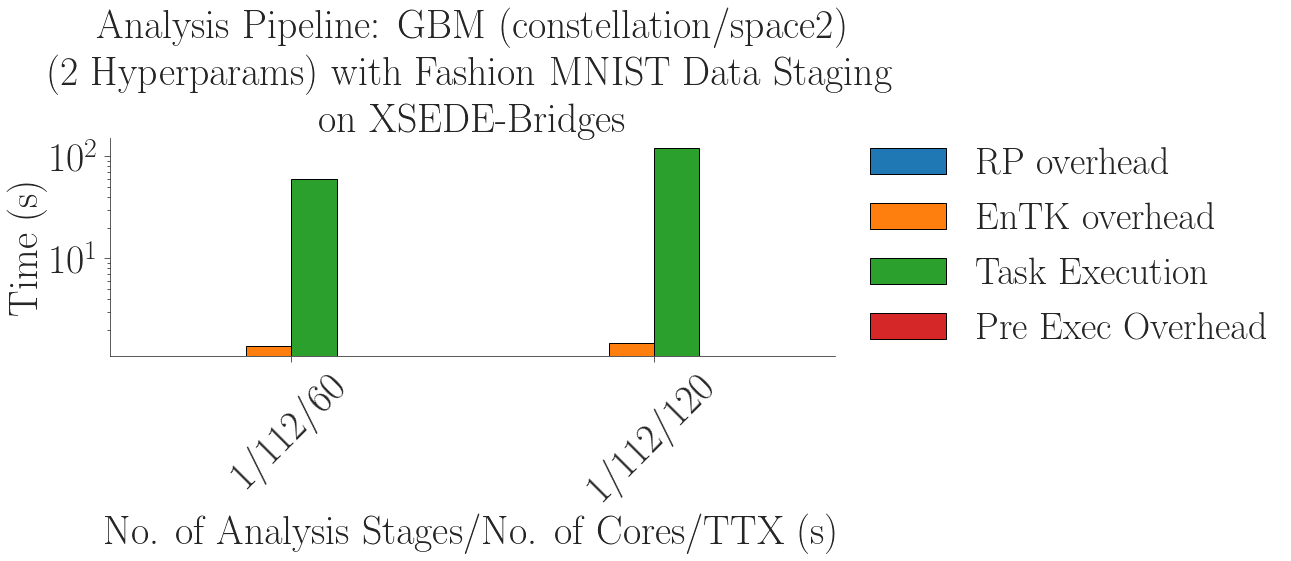

In [49]:
fig, ax = fig_setup(figsize=(13,4))
FONTSIZE = 20 
width=0.5
ax = df.plot(kind='bar',
             ax = ax,
             width = width,
#              yerr = df_err,
             logy = True,
             rot=45,
             )


plt.xticks(np.arange(2), ('1/112/60', '1/112/120'))
ax.set_title('Analysis Pipeline: GBM (constellation/space2) \n (2 Hyperparams) with Fashion MNIST Data Staging \n on XSEDE-Bridges')
ax.set_xlabel('No. of Analysis Stages/No. of Cores/TTX (s)')
ax.set_ylabel('Time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('figures/gbm-space2-1h-2h.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/gbm-space2-1h-2h.png', dpi=300, bbox_inches='tight')